# World Happiness Report  !!!!

In [1]:
# Import All libraries 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier

In [31]:
# Import CSV_data from Local system as per path
Whr = pd.read_csv('C:\data\happiness_score_dataset.csv')
Whr

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176
...,...,...,...,...,...,...,...,...,...,...,...,...
153,Rwanda,Sub-Saharan Africa,154,3.465,0.03464,0.22208,0.77370,0.42864,0.59201,0.55191,0.22628,0.67042
154,Benin,Sub-Saharan Africa,155,3.340,0.03656,0.28665,0.35386,0.31910,0.48450,0.08010,0.18260,1.63328
155,Syria,Middle East and Northern Africa,156,3.006,0.05015,0.66320,0.47489,0.72193,0.15684,0.18906,0.47179,0.32858
156,Burundi,Sub-Saharan Africa,157,2.905,0.08658,0.01530,0.41587,0.22396,0.11850,0.10062,0.19727,1.83302


In [33]:
Whr.columns

Index(['Country', 'Region', 'Happiness Rank', 'Happiness Score',
       'Standard Error', 'Economy (GDP per Capita)', 'Family',
       'Health (Life Expectancy)', 'Freedom', 'Trust (Government Corruption)',
       'Generosity', 'Dystopia Residual'],
      dtype='object')

In [34]:
Whr_columns = ['Country','Region','Happiness Score','Economy (GDP per Capita)','Family','Health (Life Expectancy)','Freedom','Trust (Government Corruption)','Generosity','Dystopia Residual']

In [37]:
Whr_columns

['Country',
 'Region',
 'Happiness Score',
 'Economy (GDP per Capita)',
 'Family',
 'Health (Life Expectancy)',
 'Freedom',
 'Trust (Government Corruption)',
 'Generosity',
 'Dystopia Residual']

In [56]:
Whr = Whr[Whr_columns].copy()

In [59]:
# crete a dataframe
happy_df = Whr.rename({'Country':'country','Region':'region','Happiness Score':'Happy_s','Economy (GDP per Capita)':'GDP_economy','Family':'family','Health (Life Expectancy)':'helth_life','Freedom':'freedom','Trust (Government Corruption)':'trust_govt_corp','Generosity':'generosity','Dystopia Residual':'Dy_residual'},axis=1)

In [60]:
happy_df.head()

,country,region,Happy_s,GDP_economy,family,helth_life,freedom,trust_govt_corp,generosity,Dy_residual
0,Switzerland,Western Europe,7.587,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,7.561,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,7.527,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,7.522,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,7.427,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176


In [61]:
# Check null values
happy_df.isnull().sum()

country            0
region             0
Happy_s            0
GDP_economy        0
family             0
helth_life         0
freedom            0
trust_govt_corp    0
generosity         0
Dy_residual        0
dtype: int64

Text(0, 0.5, 'GDP_economy')

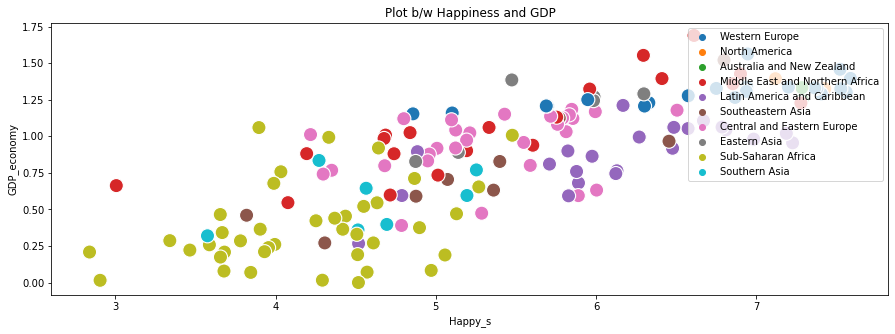

In [70]:
# plot between happiness and GDP
# Create a Scatter plot
plt.rcParams['figure.figsize'] = (15,5)
plt.title('Plot b/w Happiness and GDP')
sns.scatterplot(x = happy_df.Happy_s, y = happy_df.GDP_economy, hue = happy_df.region, s = 200);
    
plt.legend(loc = 'upper right', fontsize = '10')
plt.xlabel('Happy_s')
plt.ylabel('GDP_economy')

In [71]:
gdp_region = happy_df.groupby('region')['GDP_economy'].sum()
gdp_region

region
Australia and New Zealand           2.58376
Central and Eastern Europe         27.33071
Eastern Asia                        6.91068
Latin America and Caribbean        19.28994
Middle East and Northern Africa    21.33947
North America                       2.72080
Southeastern Asia                   7.10149
Southern Asia                       3.92340
Sub-Saharan Africa                 15.21892
Western Europe                     27.27051
Name: GDP_economy, dtype: float64

Text(0, 0.5, '')

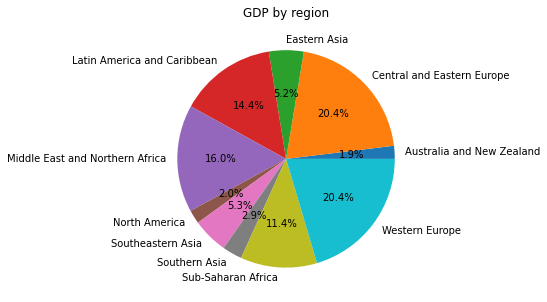

In [73]:
# ply plot
gdp_region.plot.pie(autopct = '%1.1f%%')
plt.title('GDP by region')
plt.ylabel('')

In [74]:
# Total Country
total_country = happy_df.groupby('region')[['country']].count()
print(total_country)

                                 country
region                                  
Australia and New Zealand              2
Central and Eastern Europe            29
Eastern Asia                           6
Latin America and Caribbean           22
Middle East and Northern Africa       20
North America                          2
Southeastern Asia                      9
Southern Asia                          7
Sub-Saharan Africa                    40
Western Europe                        21


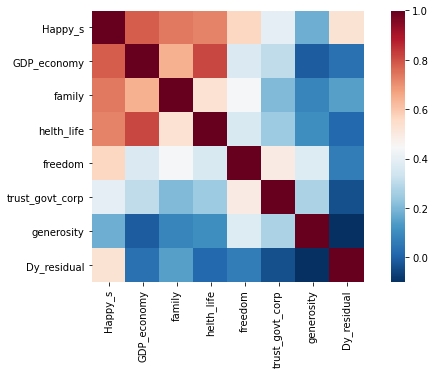

In [84]:
# Correlation map
cor = happy_df.corr(method = "pearson")
f, ax = plt.subplots(figsize = (10,5))
sns.heatmap(cor, mask = np.zeros_like(cor, dtype=np.bool),
           cmap="RdBu_r", square=True, ax=ax)

import warnings
warnings.filterwarnings("ignore")

In [85]:
# Find Cooruption list

trust_G_C = happy_df.groupby('region')[['trust_govt_corp']].mean()
trust_G_C

,trust_govt_corp
region,
Australia and New Zealand,0.392795
Central and Eastern Europe,0.086674
Eastern Asia,0.127695
Latin America and Caribbean,0.117172
Middle East and Northern Africa,0.181702
North America,0.244235
Southeastern Asia,0.151276
Southern Asia,0.102536
Sub-Saharan Africa,0.123878


<BarContainer object of 10 artists>

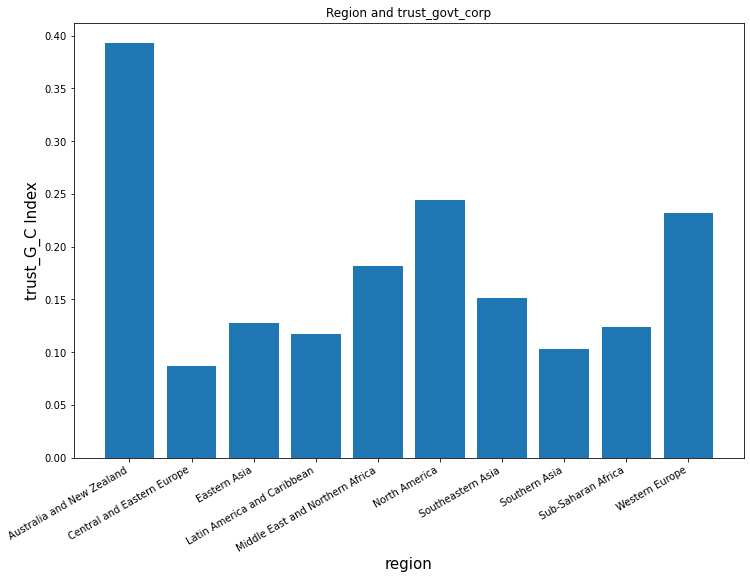

In [134]:
# BAR plot for corruption_and region
plt.rcParams['figure.figsize'] = (12,8)
plt.title('Region and trust_govt_corp')
plt.xlabel('region', fontsize = 15)
plt.ylabel('trust_G_C Index', fontsize = 15)
plt.xticks(rotation = 30, ha='right')
plt.bar(trust_G_C.index, trust_G_C.trust_govt_corp)

In [115]:
# Find top ten Happiness Country life expectancy
top_10 = happy_df.head(10)
bottom_10 = happy_df.tail(10)

Text(603.9818181818181, 0.5, 'helth_life')

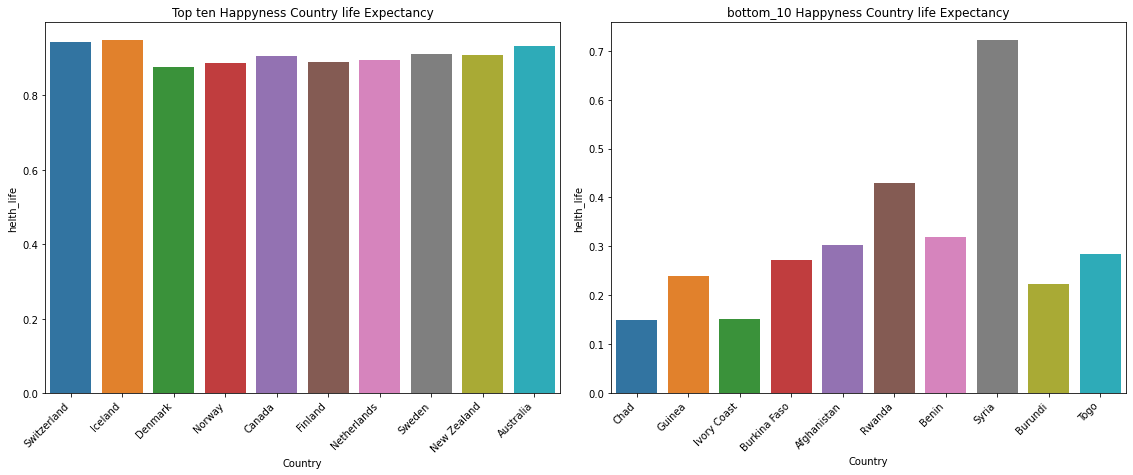

In [127]:
# Top ten Country
fig, axes=plt.subplots(1,2, figsize= (16,6))
plt.tight_layout(pad=2)
xlabels= top_10.country
axes[0].set_title('Top ten Happyness Country life Expectancy')
axes[0].set_xticklabels(xlabels, rotation=45, ha='right')
sns.barplot(x=top_10.country, y=top_10.helth_life, ax=axes[0])
axes[0].set_xlabel('Country')
axes[0].set_ylabel('helth_life')

# bottom of country
xlabels= bottom_10.country
axes[1].set_title('bottom_10 Happyness Country life Expectancy')
axes[1].set_xticklabels(xlabels, rotation=45, ha='right')
sns.barplot(x=bottom_10.country, y=bottom_10.helth_life, ax=axes[1])
axes[1].set_xlabel('Country')
axes[1].set_ylabel('helth_life')

Text(0, 0.5, 'Happy_s')

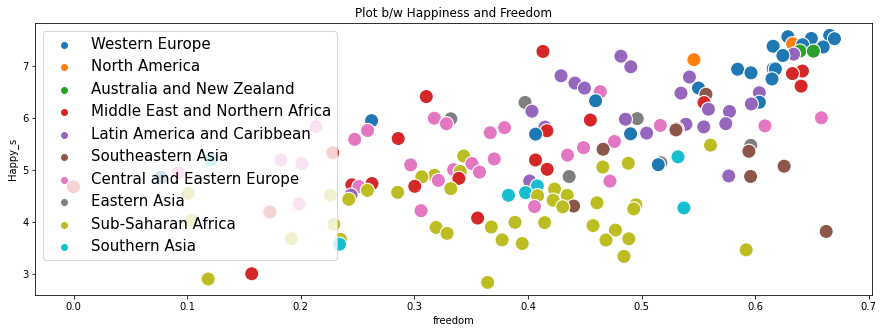

In [130]:
plt.rcParams['figure.figsize'] = (15,5)
plt.title('Plot b/w Happiness and Freedom')
sns.scatterplot(x = happy_df.freedom, y = happy_df.Happy_s, hue = happy_df.region, s = 200);
    
plt.legend(loc = 'upper left', fontsize = '15')
plt.xlabel('freedom')
plt.ylabel('Happy_s')

Text(0, 0.5, 'Happy_s')

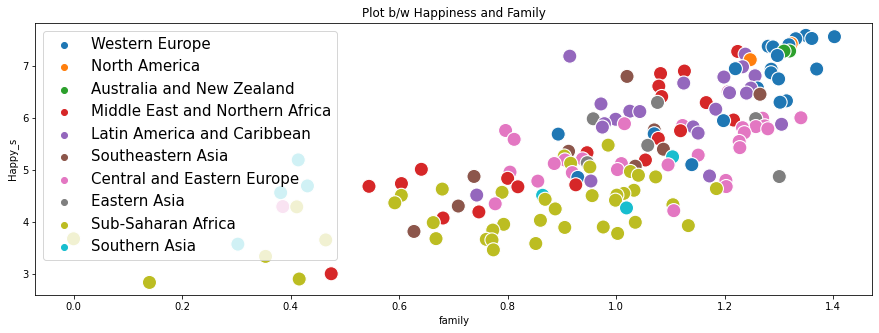

In [131]:
# Plot B/W family and happiness
plt.rcParams['figure.figsize'] = (15,5)
plt.title('Plot b/w Happiness and Family')
sns.scatterplot(x = happy_df.family, y = happy_df.Happy_s, hue = happy_df.region, s = 200);
    
plt.legend(loc = 'upper left', fontsize = '15')
plt.xlabel('family')
plt.ylabel('Happy_s')

In [132]:
family_ = happy_df.groupby('region')[['family']].mean()
family_

,family
region,
Australia and New Zealand,1.314450
Central and Eastern Europe,1.053042
Eastern Asia,1.099427
Latin America and Caribbean,1.104720
Middle East and Northern Africa,0.920490
North America,1.284860
Southeastern Asia,0.940468
Southern Asia,0.645321
Sub-Saharan Africa,0.809085


<BarContainer object of 10 artists>

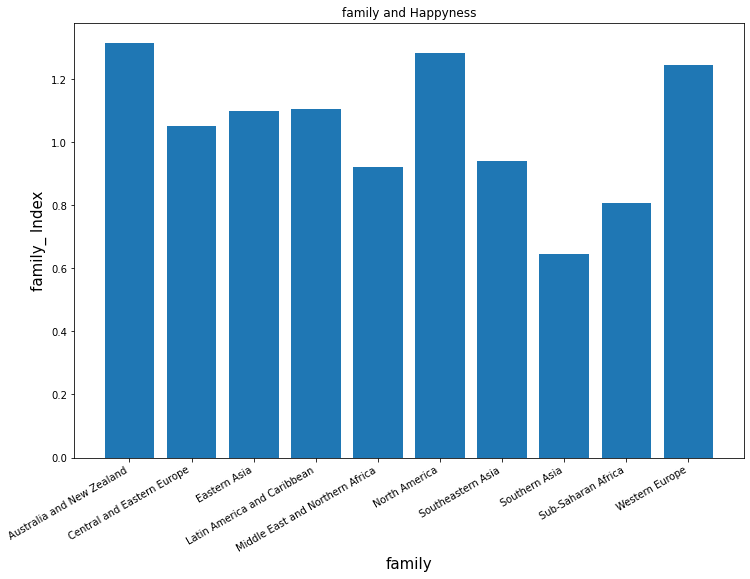

In [133]:
plt.rcParams['figure.figsize'] = (12,8)
plt.title('family and Happyness')
plt.xlabel('family', fontsize = 15)
plt.ylabel('family_ Index', fontsize = 15)
plt.xticks(rotation = 30, ha='right')
plt.bar(family_.index, family_.family)